In [5]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [6]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [8]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 30)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [9]:
winner_list = []
classes = [[0,4,5],[0,3,5],[0,3,4],[0,2,5],[0,2,4],[0,2,3],[0,1,5],[0,1,4],[0,1,3],[0,1,2]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:2580
number of class2:1855

 ****** Running generation 0 ****** 

Population's average fitness: 0.46153 stdev: 0.08040
Best fitness: 0.67328 - size: (2, 7) - species 1 - id 124
Average adjusted fitness: 0.142
Mean genetic distance 2.858, standard deviation 0.466
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.489 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50802 stdev: 0.09210
Best fitness: 0.67328 - size: (2, 7) - species 5 - id 124
Average adjusted fitness: 0.158
Mean genetic distance 2.957, standard deviation 0.494
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 10.146 sec (9.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51830 stdev: 0.09472
Best fitness: 0.67351 - size: (3, 9) - species 3 - id 465
Average adjusted fitness: 0.177
Mean genetic distance 2.954, standard deviation 0.488
Population of 202 members in 26 species
Total extinctio

Population's average fitness: 0.55084 stdev: 0.10643
Best fitness: 0.70304 - size: (4, 9) - species 30 - id 3157
Average adjusted fitness: 0.190
Mean genetic distance 3.122, standard deviation 0.585
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 14.227 sec (14.083 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.55290 stdev: 0.10739
Best fitness: 0.70304 - size: (4, 9) - species 30 - id 3157
Average adjusted fitness: 0.220
Mean genetic distance 3.143, standard deviation 0.588
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 14.460 sec (14.120 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.55489 stdev: 0.10773
Best fitness: 0.70304 - size: (4, 9) - species 30 - id 3157
Average adjusted fitness: 0.201
Mean genetic distance 3.039, standard deviation 0.592
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 16.340 sec (14.414 average)

 ***

Population of 198 members in 25 species
Total extinctions: 0
Generation time: 17.713 sec (15.207 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55752 stdev: 0.11215
Best fitness: 0.72469 - size: (2, 8) - species 30 - id 356
Average adjusted fitness: 0.269
Mean genetic distance 3.051, standard deviation 0.537
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 15.579 sec (15.344 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.56625 stdev: 0.10732
Best fitness: 0.72469 - size: (2, 8) - species 30 - id 356
Average adjusted fitness: 0.222
Mean genetic distance 3.068, standard deviation 0.534
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 16.051 sec (15.471 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56873 stdev: 0.10802
Best fitness: 0.72469 - size: (2, 8) - species 30 - id 356
Average adjusted fitness: 0.283
Mean genetic distance 


Population's average fitness: 0.55822 stdev: 0.07998
Best fitness: 0.77880 - size: (4, 11) - species 3 - id 2039
Average adjusted fitness: 0.117
Mean genetic distance 3.058, standard deviation 0.520
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 14.142 sec (13.357 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55527 stdev: 0.09076
Best fitness: 0.77880 - size: (4, 11) - species 3 - id 2039
Average adjusted fitness: 0.278
Mean genetic distance 3.066, standard deviation 0.513
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.026 sec (13.456 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55300 stdev: 0.07962
Best fitness: 0.77880 - size: (4, 11) - species 3 - id 2039
Average adjusted fitness: 0.120
Mean genetic distance 3.051, standard deviation 0.526
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.232 sec (13.590 average)

 **

Generation time: 13.518 sec (12.806 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57246 stdev: 0.21035
Best fitness: 0.84171 - size: (4, 12) - species 25 - id 801
Average adjusted fitness: 0.359
Mean genetic distance 3.077, standard deviation 0.469
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 13.779 sec (12.927 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57256 stdev: 0.21607
Best fitness: 0.84171 - size: (4, 12) - species 25 - id 801
Average adjusted fitness: 0.343
Mean genetic distance 3.073, standard deviation 0.494
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 13.763 sec (13.020 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59260 stdev: 0.20835
Best fitness: 0.84397 - size: (4, 11) - species 6 - id 1466
Average adjusted fitness: 0.353
Mean genetic distance 3.090, standard deviation 0.502
Population of 202 members in 

Population's average fitness: 0.51777 stdev: 0.07965
Best fitness: 0.65660 - size: (2, 8) - species 5 - id 327
Average adjusted fitness: 0.205
Mean genetic distance 2.885, standard deviation 0.478
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 11.311 sec (10.871 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52348 stdev: 0.08056
Best fitness: 0.67125 - size: (3, 9) - species 16 - id 509
Average adjusted fitness: 0.182
Mean genetic distance 2.871, standard deviation 0.493
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 11.603 sec (11.115 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52568 stdev: 0.08069
Best fitness: 0.67125 - size: (3, 9) - species 22 - id 509
Average adjusted fitness: 0.170
Mean genetic distance 2.909, standard deviation 0.530
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 12.179 sec (11.381 average)

 ****** Ru

Generation time: 16.233 sec (15.708 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.54857 stdev: 0.09741
Best fitness: 0.76144 - size: (8, 21) - species 8 - id 3489
Average adjusted fitness: 0.222
Mean genetic distance 3.282, standard deviation 0.547
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.048 sec (15.783 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.54497 stdev: 0.09979
Best fitness: 0.76144 - size: (8, 21) - species 8 - id 3489
Average adjusted fitness: 0.219
Mean genetic distance 3.308, standard deviation 0.542
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 16.251 sec (15.899 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.53811 stdev: 0.10021
Best fitness: 0.76144 - size: (8, 21) - species 8 - id 3489
Average adjusted fitness: 0.219
Mean genetic distance 3.311, standard deviation 0.544
Population of 193 members 

Population's average fitness: 0.55335 stdev: 0.09384
Best fitness: 0.74927 - size: (4, 11) - species 38 - id 2665
Average adjusted fitness: 0.163
Mean genetic distance 3.119, standard deviation 0.519
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.667 sec (14.423 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56165 stdev: 0.09484
Best fitness: 0.74927 - size: (4, 11) - species 38 - id 2665
Average adjusted fitness: 0.191
Mean genetic distance 3.087, standard deviation 0.497
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 15.492 sec (14.533 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.54945 stdev: 0.10015
Best fitness: 0.77858 - size: (4, 10) - species 3 - id 3161
Average adjusted fitness: 0.221
Mean genetic distance 3.036, standard deviation 0.516
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 14.516 sec (14.534 average)

 *

Mean genetic distance 3.040, standard deviation 0.516
Population of 207 members in 51 species
Total extinctions: 0
Generation time: 13.611 sec (13.306 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.54398 stdev: 0.08500
Best fitness: 0.70891 - size: (4, 12) - species 25 - id 1451
Average adjusted fitness: 0.122
Mean genetic distance 3.049, standard deviation 0.520
Population of 216 members in 51 species
Total extinctions: 0
Generation time: 13.557 sec (13.407 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.56143 stdev: 0.07426
Best fitness: 0.70891 - size: (4, 12) - species 25 - id 1451
Average adjusted fitness: 0.138
Mean genetic distance 3.059, standard deviation 0.538
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 14.001 sec (13.535 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.54388 stdev: 0.08594
Best fitness: 0.70891 - size: (4, 12) - species 25 - id

Population's average fitness: 0.56667 stdev: 0.11867
Best fitness: 0.91725 - size: (4, 12) - species 15 - id 1443
Average adjusted fitness: 0.418
Mean genetic distance 2.959, standard deviation 0.499
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.259 sec (12.329 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56912 stdev: 0.12603
Best fitness: 0.93890 - size: (5, 13) - species 5 - id 1610
Average adjusted fitness: 0.432
Mean genetic distance 2.992, standard deviation 0.500
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 14.918 sec (12.764 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58209 stdev: 0.12888
Best fitness: 0.93890 - size: (5, 13) - species 5 - id 1610
Average adjusted fitness: 0.305
Mean genetic distance 3.034, standard deviation 0.517
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 15.495 sec (13.208 average)

 **

Generation time: 13.859 sec (12.454 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53564 stdev: 0.10028
Best fitness: 0.83517 - size: (4, 9) - species 31 - id 562
Average adjusted fitness: 0.367
Mean genetic distance 3.000, standard deviation 0.500
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 12.414 sec (12.444 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54834 stdev: 0.09855
Best fitness: 0.83517 - size: (4, 9) - species 31 - id 562
Average adjusted fitness: 0.347
Mean genetic distance 3.006, standard deviation 0.511
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 12.438 sec (12.443 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54951 stdev: 0.09913
Best fitness: 0.83517 - size: (4, 9) - species 31 - id 562
Average adjusted fitness: 0.354
Mean genetic distance 3.036, standard deviation 0.502
Population of 206 members in 41 

Population's average fitness: 0.59038 stdev: 0.13019
Best fitness: 0.85862 - size: (7, 20) - species 12 - id 3539
Average adjusted fitness: 0.315
Mean genetic distance 3.108, standard deviation 0.508
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.346 sec (14.436 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.58395 stdev: 0.12366
Best fitness: 0.85862 - size: (7, 20) - species 12 - id 3539
Average adjusted fitness: 0.220
Mean genetic distance 3.096, standard deviation 0.508
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 15.221 sec (14.612 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58840 stdev: 0.13473
Best fitness: 0.85862 - size: (7, 20) - species 12 - id 3539
Average adjusted fitness: 0.200
Mean genetic distance 3.109, standard deviation 0.500
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 14.760 sec (14.738 average)
nu

Population's average fitness: 0.54190 stdev: 0.10285
Best fitness: 0.74949 - size: (4, 10) - species 16 - id 1296
Average adjusted fitness: 0.153
Mean genetic distance 3.119, standard deviation 0.514
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 15.595 sec (13.933 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.55934 stdev: 0.10483
Best fitness: 0.74949 - size: (4, 10) - species 16 - id 1296
Average adjusted fitness: 0.277
Mean genetic distance 3.097, standard deviation 0.541
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 15.168 sec (14.166 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.55020 stdev: 0.10390
Best fitness: 0.74949 - size: (4, 10) - species 16 - id 1296
Average adjusted fitness: 0.130
Mean genetic distance 3.107, standard deviation 0.543
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 15.352 sec (14.409 average)

 

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
number_codes = [[1,1,1,1,1,1,1,1,1,1],
[0,0,0,0,0,0,1,1,1,1],
[0,0,0,1,1,1,0,0,0,1],
[0,1,1,0,0,1,0,0,1,0],
[1,0,1,0,1,0,0,1,0,0],
[1,1,0,1,0,0,1,0,0,0]]

In [14]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.6575

In [16]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:1 index:[2] real:2
#1 min_error:2 index:[2] real:2
#2 min_error:1 index:[2] real:3
#3 min_error:2 index:[2] real:3
#4 min_error:2 index:[2] real:3
#5 min_error:1 index:[2] real:3
#6 min_error:2 index:[2] real:3
#7 min_error:3 index:[2 3 5] real:3
#8 min_error:2 index:[2] real:3
#9 min_error:3 index:[2 3 5] real:3
#10 min_error:3 index:[2 3 5] real:3
#11 min_error:3 index:[2 3 5] real:3
#12 min_error:3 index:[2 3 5] real:3
#13 min_error:3 index:[2 3 5] real:3
#14 min_error:2 index:[2] real:2
#15 min_error:2 index:[2] real:2
#16 min_error:1 index:[2] real:2
#17 min_error:1 index:[2] real:2
#18 min_error:2 index:[2] real:2
#19 min_error:2 index:[2] real:2
#20 min_error:1 index:[2] real:2
#21 min_error:1 index:[2] real:2
#22 min_error:1 index:[2] real:2
#23 min_error:2 index:[2] real:2
#24 min_error:2 index:[2] real:2
#25 min_error:2 index:[5] real:2
#26 min_error:2 index:[2] real:2
#27 min_error:2 index:[2] real:4
#28 min_error:2 index:[5] real:5
#29 min_error:3 index:[2 3 5]

#584 min_error:3 index:[2 3 5] real:2
#585 min_error:3 index:[2 3 5] real:2
#586 min_error:1 index:[1] real:1
#587 min_error:1 index:[1] real:1
#588 min_error:3 index:[2 3 5] real:5
#589 min_error:3 index:[2 3 5] real:5
#590 min_error:3 index:[2 3 5] real:5
#591 min_error:2 index:[2] real:5
#592 min_error:3 index:[2 3 5] real:5
#593 min_error:1 index:[2] real:5
#594 min_error:3 index:[2 3 5] real:5
#595 min_error:1 index:[4] real:4
#596 min_error:0 index:[4] real:4
#597 min_error:1 index:[4] real:4
#598 min_error:1 index:[4] real:4
#599 min_error:0 index:[4] real:4
#600 min_error:0 index:[4] real:4
#601 min_error:0 index:[1] real:1
#602 min_error:0 index:[1] real:1
#603 min_error:2 index:[5] real:3
#604 min_error:3 index:[2 3 5] real:2
#605 min_error:1 index:[1] real:1
#606 min_error:1 index:[1] real:1
#607 min_error:1 index:[1] real:1
#608 min_error:1 index:[1] real:1
#609 min_error:4 index:[1 2 5] real:5
#610 min_error:2 index:[5] real:5
#611 min_error:2 index:[5] real:5
#612 min_err

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[455   4   5   1  40   1]
 [  0 206   1   0  15   0]
 [  2   4 306 114  26 190]
 [  2   0  27  33   7  80]
 [  2   7   0   2 121   5]
 [  0   3  58  61  28 194]]


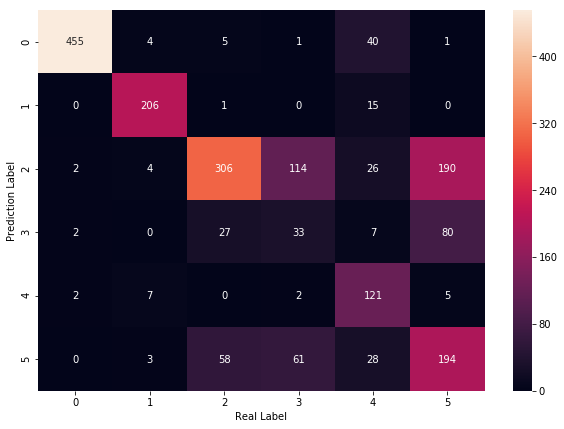

In [18]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()